In [1]:
from textblob import TextBlob
import re
from nltk import word_tokenize 
from nltk import pos_tag
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import speech_recognition as sr 
import moviepy.editor as mp

In [2]:
# clip = mp.VideoFileClip(r"recording2.webm") 
# clip.audio.write_audiofile(r"converted.wav")

In [3]:
# r = sr.Recognizer()
# r.pause_threshold = 20000
# r.energy_threshold = 4000
# audio = sr.AudioFile("converted.wav")

In [4]:
# with audio as source:
#     r.adjust_for_ambient_noise(source)
#     audio_file = r.record(source,duration=10000)
#     print(audio_file.)

In [5]:
# with open('recognized.txt',mode ='w') as file: 
#     file.write(result) 

In [6]:
# All the function recognize_google() does is to call the google Speech API and get back the result. When I used the provided audio file, I got back the transcription of the first 30 seconds. That's due to the limitation of the free version of the Google speech API and has nothing to do with the code.

In [59]:
df_results = pd.DataFrame(columns=['n-gram', 'sentiment_score', 'sentiment_label'])
df_results_vader = pd.DataFrame(columns=['n-gram', 'pos', 'neg', 'neu', 'compound', 'sentiment_label'])
df_comparison = pd.DataFrame(columns=['n-gram', 'textblob-score', 'textblob-subjectivity', 'vader-pos', 'vader-neg', 'vader-neu', 'vader-compound'])
df_azure_speech = pd.DataFrame(columns=['Sentence', 'Pre-processed sentence', 'textblob-subjectivity', 'textblob-score', 'vader-pos','textblob-polarity', 'vader-neg', 'vader-neu', 'vader-compound', 'vader-polarity'])
pos_words_str = ""
neg_words_str = ""
pos_words_str_vader = ""
neg_words_str_vader = ""

test_sentence = "The website seems to be outdated, so I'm not sure this information is correct or relevant."

In [8]:
df_results

,n-gram,sentiment_score,sentiment_label


In [9]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [10]:
with open("transcript2.txt") as transcript:
    lines = transcript.readlines()
#print(lines)
# subor obsahuje len jeden riadok, inak by nam vratil list a kazdy riadok by bol prvok v liste
#print(lines[0])

In [11]:
ngram_object = TextBlob(lines[0])

In [12]:
ngrams = ngram_object.ngrams(n=4) 
#print(ngrams) 

In [13]:
# for ngram in ngrams:
#     ngram_str = TextBlob(' '.join(ngram))
#     sentiment = ngram_str.sentiment.polarity
#     subjectivity = ngram_str.sentiment.subjectivity
#     if sentiment >= 0.2:
#         print('Ngram: ' + ' '.join(ngram) + ' | sentiment: ' + str(sentiment) + ' | subjectivity: ' + str(subjectivity))
#     if sentiment < 0:
#         print('Ngram: ' + ' '.join(ngram) + ' | sentiment: ' + str(sentiment) + ' | subjectivity: ' + str(subjectivity))

In [14]:
# remove punct, lower case everything etc...
# then ngrams -> how large?
# then standard text pre processing for ngrams
# then TextBlob 

In [15]:
# with open("e-lekar.txt", 'r') as transcript:
#     lines = transcript.read().replace('\n', ' ')

In [60]:
with open("e-lekar.txt", 'r') as transcript_sentences:
    text = transcript_sentences.read()

sentences = re.split(r' *[\.\?!][\'"\)\]]* *', text)
test_sentence_ = re.split(r' *[\.\?!][\'"\)\]]* *', test_sentence)
print(test_sentence_)

["The website seems to be outdated, so I'm not sure this information is correct or relevant", '']


In [17]:
# for sentence in sentences:
#     print(sentence)
#     df_azure_speech.append({'Sentence': sentence}, ignore_index=True)

In [18]:
df_azure_speech

,Sentence,Pre-processed sentence,textblob-subjectivity,textblob-score,vader-pos,textblob-polarity,vader-neg,vader-neu,vader-compound,vader-polarity


In [61]:
def clean_sentences(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

lines_clean = []
for sentence in sentences:
    lines_clean.append(clean_sentences(sentence))
    
test_sentence_ = clean_sentences(test_sentence)
print(test_sentence_)

The website seems to be outdated so I am not sure this information is correct or relevant 


In [67]:
# for sentence in lines_clean:
#     print(sentence)
test_sentence_new = []
for word in list(test_sentence_.split(" ")):
    print(word)
    if word.lower() not in set(item_list):
        test_sentence_new.append(word)

The
website
seems
to
be
outdated
so
I
am
not
sure
this
information
is
correct
or
relevant



In [68]:
print(test_sentence_new)

['website', 'seems', 'outdated', 'not', 'sure', 'information', 'correct', 'relevant', '']


In [21]:
def clean(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [22]:
# lines_clean = clean(lines)
# print(lines_clean)

In [23]:
# print((stopwords.words('english')))
stopwords_custom = stopwords.words('english')

In [62]:
unwanted = {'no', 'not', 'nor'}
item_list = [e for e in stopwords_custom if e not in unwanted]

In [25]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(str(text)))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(item_list):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [79]:
test_sentence_new_tok = word_tokenize(str(test_sentence_new))
test_pos = pos_tag(word_tokenize(str(["The website seems to be outdated, so I'm not sure this information is accurate or relevant."])))

print(test_pos)


[('[', 'NN'), ('``', '``'), ('The', 'DT'), ('website', 'NN'), ('seems', 'VBZ'), ('to', 'TO'), ('be', 'VB'), ('outdated', 'VBN'), (',', ','), ('so', 'IN'), ('I', 'PRP'), ("'m", 'VBP'), ('not', 'RB'), ('sure', 'JJ'), ('this', 'DT'), ('information', 'NN'), ('is', 'VBZ'), ('accurate', 'JJ'), ('or', 'CC'), ('relevant', 'JJ'), ('.', '.'), ("''", "''"), (']', 'NN')]


In [ ]:
lines_token_stop_pos = []
for sentence in lines_clean:
    lines_token_stop_pos.append(token_stop_pos(sentence))

In [27]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew         

In [28]:
lines_lemma = []
for phrase in lines_token_stop_pos:
    lines_lemma.append(lemmatize(phrase).lower())

In [29]:
# ngram_object = TextBlob(lines_lemma)
# ngrams = ngram_object.ngrams(n=5) 
analyzer = SentimentIntensityAnalyzer()
#print(type(lines_lemma))

# for li in lines_lemma:
#     print(li)

In [30]:
# textblob_objects = TextBlob(lines_lemma)
for sentence, line in zip(sentences, lines_lemma):
    txtblob_object = TextBlob(line)
    sentiment = txtblob_object.sentiment.polarity
    subjectivity = txtblob_object.sentiment.subjectivity
    sentiment_vader = analyzer.polarity_scores(txtblob_object)
    # df_azure_speech = pd.DataFrame(columns=['Sentence', 'Pre-processed sentence', 'textblob-subjectivity', 'textblob-score', 'vader-pos','textblob-polarity', 'vader-neg', 'vader-neu', 'vader-compound', 'vader-polarity'])
    df_azure_speech = df_azure_speech.append({'Sentence': sentence,'Pre-processed sentence': line, 'textblob-subjectivity': subjectivity, 'textblob-score': sentiment, 'vader-pos': sentiment_vader['pos'], 'vader-neg': sentiment_vader['neg'], 'vader-neu':sentiment_vader['neu'], 'vader-compound':sentiment_vader['compound']}, ignore_index=True)
  

In [31]:
df_azure_speech.to_csv("results_elekar-2.csv")

In [32]:
for ngram in ngrams:
    ngram_str = TextBlob(' '.join(ngram))
    sentiment = ngram_str.sentiment.polarity
    subjectivity = ngram_str.sentiment.subjectivity
    sentiment_vader = analyzer.polarity_scores(ngram_str)
    # (columns=['n-gram', 'textblob-score', 'textblob-subjectivity', 'vader-pos', 'vader-neg', 'vader-neu'])
    # df_azure_speech = pd.DataFrame(columns=['Sentence', 'Pre-processed sentence', 'textblob-subjectivity', 'textblob-score', 'vader-pos','textblob-polarity', 'vader-neg', 'vader-neu', 'vader-compound', 'vader-polarity'])

    df_comparison = df_comparison.append({'n-gram': ' '.join(ngram), 'textblob-score': sentiment, 'textblob-subjectivity': subjectivity, 'vader-pos': sentiment_vader['pos'], 'vader-neg': sentiment_vader['neg'], 'vader-neu':sentiment_vader['neu'], 'vader-compound':sentiment_vader['compound']}, ignore_index=True)
    if subjectivity <= 0:
        pass
        # print(' '.join(ngram) + ' ' + str(ngram_str.sentiment.subjectivity))
    if sentiment > 0:
        df_results = df_results.append({'n-gram': ' '.join(ngram), 'sentiment_score': sentiment, 'sentiment_label': 'Positive'}, ignore_index=True)
        pos_words_str += " " +  ' '.join(ngram)
        # print('Ngram: ' + ' '.join(ngram) + ' | sentiment: ' + str(sentiment) + ' | subjectivity: ' + str(subjectivity))
    if sentiment < 0:
        # print('Ngram: ' + ' '.join(ngram) + ' | sentiment: ' + str(sentiment) + ' | subjectivity: ' + str(subjectivity))
        df_results = df_results.append({'n-gram': ' '.join(ngram), 'sentiment_score': sentiment, 'sentiment_label': 'Negative'}, ignore_index=True)
        neg_words_str += " " + ' '.join(ngram)
    if sentiment == 0:
        df_results = df_results.append({'n-gram': ' '.join(ngram), 'sentiment_score': sentiment, 'sentiment_label': 'Neutral'}, ignore_index=True)

In [33]:
df_comparison.to_csv("results_3.csv")

In [34]:
# for ngram in ngrams:
#     ngram_str = TextBlob(' '.join(ngram), analyzer=NaiveBayesAnalyzer())
#     sentiment = ngram_str.sentiment
#     print('Ngram: ' + ' '.join(ngram) + ' | sentiment: ' + str(sentiment))
# # pomale

In [35]:
# def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
#     h = int(360.0 * 45.0 / 255.0)
#     s = int(100.0 * 255.0 / 255.0)
#     l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

#     return "hsl({}, {}%, {}%)".format(h, s, l)

In [36]:
# file_content=open ("part_1.txt").read()

# wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
#                             stopwords = STOPWORDS,
#                             background_color = 'white',
#                             width = 1200,
#                             height = 1000,
#                             color_func = random_color_func
#                             ).generate(lines_lemma)

In [37]:
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
# rozdelit na pos a neg word cloud
# histogram sentimentu 
# vseobecny pocet sentimentu (pos, neg)
# top neg, top pos
# convert results to dataframe / csv 

In [38]:
# wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
#                             stopwords = STOPWORDS,
#                             background_color = 'white',
#                             width = 1200,
#                             height = 1000,
#                             color_func = random_color_func
#                             ).generate(pos_words_str)
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [39]:
# wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
#                             stopwords = STOPWORDS,
#                             background_color = 'white',
#                             width = 1200,
#                             height = 1000,
#                             color_func = random_color_func
#                             ).generate(neg_words_str)
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [40]:
def sentiment_analysis(textfile):
    with open(textfile) as transcript:
        lines = transcript.readlines()
    lines_clean = clean(lines[0])
    lines_token_stop_pos = token_stop_pos(lines_clean)
    lines_lemma = lemmatize(lines_token_stop_pos).lower()
    ngram_object = TextBlob(lines_lemma)
    ngrams = ngram_object.ngrams(n=3) 
    for ngram in ngrams:
        ngram_str = TextBlob(' '.join(ngram))
        sentiment = ngram_str.sentiment.polarity
        subjectivity = ngram_str.sentiment.subjectivity
        # sentiment_vader = analyzer.polarity_scores(ngram_str)
        if sentiment >= 0.2:
            print('Ngram: ' + ' '.join(ngram) + ' | sentiment: ' + str(sentiment) + ' | subjectivity: ' + str(subjectivity))
        if sentiment < 0:
            print('Ngram: ' + ' '.join(ngram) + ' | sentiment: ' + str(sentiment) + ' | subjectivity: ' + str(subjectivity))
    
#     file_content=open (textfile).read()

#     wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
#                             stopwords = STOPWORDS,
#                             background_color = 'white',
#                             width = 1200,
#                             height = 1000,
#                             color_func = random_color_func
#                             ).generate(lines_lemma)
#     plt.imshow(wordcloud)
#     plt.axis('off')
#     plt.show()

In [41]:
sentiment_analysis("testing_text.txt")

Ngram: see problem fine | sentiment: 0.4166666666666667 | subjectivity: 0.5
Ngram: problem fine would | sentiment: 0.4166666666666667 | subjectivity: 0.5
Ngram: fine would good | sentiment: 0.5583333333333333 | subjectivity: 0.55
Ngram: would good large | sentiment: 0.45714285714285713 | subjectivity: 0.5142857142857143
Ngram: good large not | sentiment: 0.45714285714285713 | subjectivity: 0.5142857142857143
Ngram: large not able | sentiment: -0.017857142857142863 | subjectivity: 0.5267857142857143
Ngram: not able find | sentiment: -0.25 | subjectivity: 0.625
Ngram: able find first | sentiment: 0.375 | subjectivity: 0.47916666666666663
Ngram: find first spot | sentiment: 0.25 | subjectivity: 0.3333333333333333
Ngram: first spot right | sentiment: 0.26785714285714285 | subjectivity: 0.43452380952380953
Ngram: deal number small | sentiment: -0.25 | subjectivity: 0.4
Ngram: number small problematic | sentiment: -0.25 | subjectivity: 0.4
Ngram: small problematic not | sentiment: -0.25 | su

In [42]:
str_ = TextBlob("best")
sentiment = str_.sentiment.polarity
print(sentiment)

str_ = TextBlob("not the best")
sentiment = str_.sentiment.polarity
print(sentiment)

str_ = TextBlob("not best")
sentiment = str_.sentiment.polarity
print(sentiment)

str_ = TextBlob("wasn't best")
sentiment = str_.sentiment.polarity
print(sentiment)

1.0
1.0
-0.5
1.0


In [43]:
from textblob.sentiments import NaiveBayesAnalyzer
a = "it was very problematic"
b = TextBlob(a, analyzer=NaiveBayesAnalyzer())
print(b.sentiment)

Sentiment(classification='neg', p_pos=0.3272750567424299, p_neg=0.6727249432575704)


In [44]:
# The textblob.sentiments module contains two sentiment analysis implementations, PatternAnalyzer (based on the pattern library) and NaiveBayesAnalyzer (an NLTK classifier trained on a movie reviews corpus).
# The default implementation is PatternAnalyzer, but you can override the analyzer by passing another implementation into a TextBlob’s constructor.

In [45]:
str_ = TextBlob("big problem")
sentiment = str_.sentiment.polarity
print(sentiment)

0.0


In [46]:
df_results

,n-gram,sentiment_score,sentiment_label
0,want to speak real,0.200,Positive
1,to speak real English,0.000,Neutral
2,speak real English from,0.000,Neutral
3,real English from your,0.000,Neutral
4,English from your first,0.125,Positive
...,...,...,...
170,say not I do,0.000,Neutral
171,not I do n't,0.000,Neutral
172,I do n't know,0.000,Neutral
173,do n't know water,0.000,Neutral


array([[<AxesSubplot:title={'center':'sentiment_score'}>]], dtype=object)

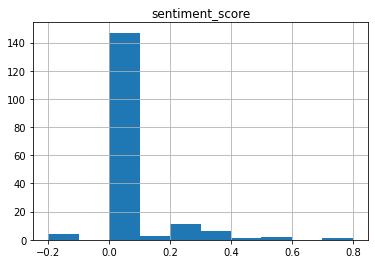

In [47]:
df_results.hist()

<AxesSubplot:xlabel='sentiment_label', ylabel='sentiment_score'>

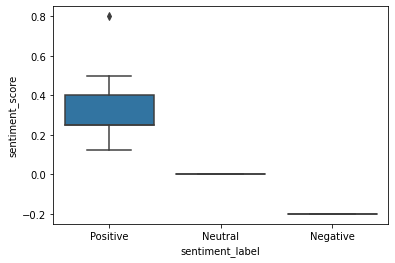

In [48]:
sns.boxplot(data=df_results, x="sentiment_label", y="sentiment_score")

<AxesSubplot:ylabel='sentiment_label'>

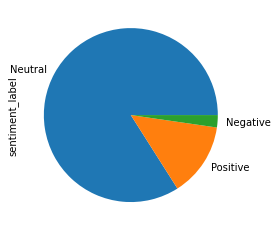

In [49]:
df_results.sentiment_label.value_counts().plot(kind='pie')

In [50]:
df_results.sort_values('sentiment_score').head(20)

,n-gram,sentiment_score,sentiment_label
152,your everyday life if,-0.2,Negative
150,situations in your everyday,-0.2,Negative
153,everyday life if I,-0.2,Negative
151,in your everyday life,-0.2,Negative
124,see a computer I,0.0,Neutral
127,I should n't think,0.0,Neutral
110,of them in your,0.0,Neutral
111,them in your target,0.0,Neutral
112,in your target language,0.0,Neutral
113,your target language so,0.0,Neutral


In [51]:
df_results.sort_values('sentiment_score', ascending=False).head(20)

,n-gram,sentiment_score,sentiment_label
22,name is Alicia welcome,0.800000,Positive
28,top words today we,0.500000,Positive
27,to top words today,0.500000,Positive
25,welcome back to top,0.433333,Positive
24,Alicia welcome back to,0.400000,Positive
23,is Alicia welcome back,0.400000,Positive
10,up for your free,0.400000,Positive
11,for your free lifetime,0.400000,Positive
12,your free lifetime account,0.400000,Positive
13,free lifetime account at,0.400000,Positive


In [52]:
# mask = np.array(Image.open('flower.png'))

In [53]:
# wc = WordCloud(stopwords=STOPWORDS, font_path=r'C:\Windows\Fonts\Verdana.ttf',
#                mask=mask, background_color="white",
#                max_words=2000, max_font_size=256,
#                random_state=42, width=mask.shape[1],
#                height=mask.shape[0])
# wc.generate(lines_lemma)
# plt.imshow(wc, interpolation="bilinear")
# plt.axis('off')
# plt.show()
# wc.to_file("wordcloud_flower.png")

### VADER

In [54]:
# https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk 

In [55]:
analyzer = SentimentIntensityAnalyzer()

In [56]:
df_results_vader

,n-gram,pos,neg,neu,compound,sentiment_label


In [57]:
for ngram in ngrams:
    ngram_str = ' '.join(ngram)
    sentiment = analyzer.polarity_scores(ngram_str)
    if sentiment['compound'] < 0:
        neg_words_str_vader += " " +  ' '.join(ngram)
        df_results_vader = df_results_vader.append({'n-gram': ' '.join(ngram), 'pos': sentiment['pos'], 'neg': sentiment['neg'], 'neu':sentiment['neu'], 'compound': sentiment['compound'], 'sentiment_label': 'Negative'}, ignore_index=True)
    if sentiment['compound'] > 0:
        pos_words_str_vader += " " +  ' '.join(ngram)
        df_results_vader = df_results_vader.append({'n-gram': ' '.join(ngram), 'pos': sentiment['pos'], 'neg': sentiment['neg'], 'neu':sentiment['neu'], 'compound': sentiment['compound'], 'sentiment_label': 'Positive'}, ignore_index=True)
    if sentiment['compound'] == 0:
        df_results_vader = df_results_vader.append({'n-gram': ' '.join(ngram), 'pos': sentiment['pos'], 'neg': sentiment['neg'], 'neu':sentiment['neu'], 'compound': sentiment['compound'], 'sentiment_label': 'Neutral'}, ignore_index=True)

In [58]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(neg_words_str_vader)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'random_color_func' is not defined

In [ ]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(pos_words_str_vader)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df_results_vader

In [ ]:
df_results_vader.sort_values('compound', ascending=False).head(20)

In [ ]:
df_results_vader.sort_values('compound').head(20)

In [ ]:
df_results_vader.sentiment_label.value_counts().plot(kind='pie')

In [ ]:
sns.histplot(df_results_vader.compound)

In [ ]:
sns.boxplot(data=df_results_vader, x="sentiment_label", y="compound")